In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
yelp  = pd.read_csv('yelp.csv')

In [4]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [5]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [6]:
yelp.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [7]:
yelp['text_length'] = yelp['text'].apply(len)

In [8]:
sns.set_style('white')

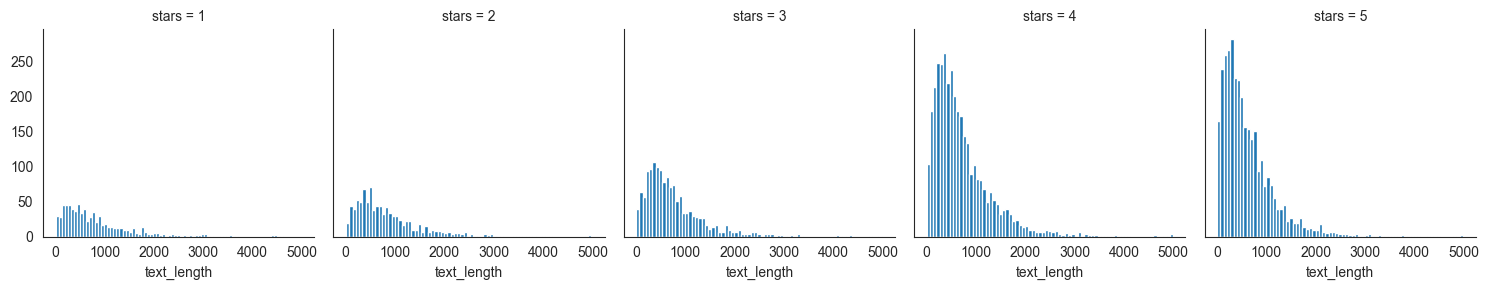

In [13]:
g = sns.FacetGrid(yelp,col = 'stars')
g.map(plt.hist,'text_length' , bins = 75)

<Axes: xlabel='stars', ylabel='text_length'>

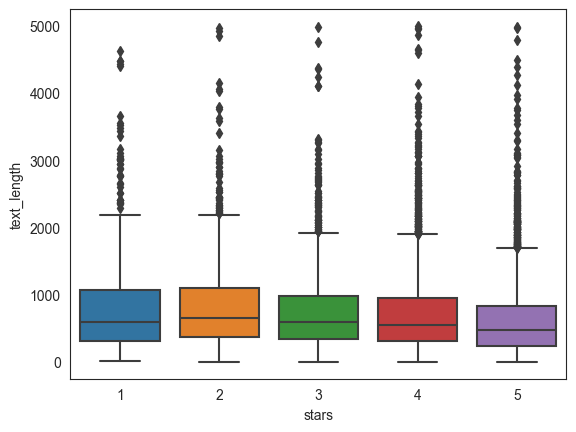

In [14]:
sns.boxplot(x = 'stars' , y = 'text_length' , data = yelp)

<Axes: xlabel='stars', ylabel='count'>

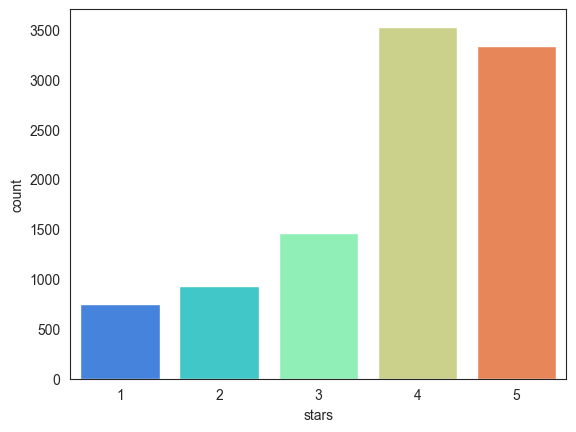

In [15]:
sns.countplot(x = 'stars' , data = yelp , palette='rainbow')

In [20]:
starsMean = yelp.groupby('stars').mean(numeric_only=True)
print(starsMean)


           cool    useful     funny  text_length
stars                                           
1      0.576769  1.604806  1.056075   826.515354
2      0.719525  1.563107  0.875944   842.256742
3      0.788501  1.306639  0.694730   758.498289
4      0.954623  1.395916  0.670448   712.923142
5      0.944261  1.381780  0.608631   624.999101


In [22]:
starsMean.corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


<Axes: >

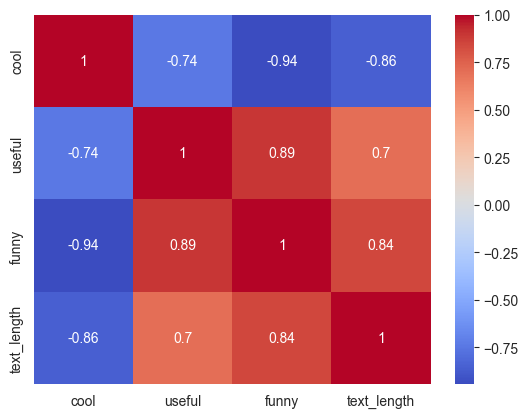

In [24]:
sns.heatmap(starsMean.corr(),cmap = 'coolwarm',annot = True)

In [25]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]

In [26]:
yelp_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4086 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   type         4086 non-null   object
 6   user_id      4086 non-null   object
 7   cool         4086 non-null   int64 
 8   useful       4086 non-null   int64 
 9   funny        4086 non-null   int64 
 10  text_length  4086 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [36]:
X = yelp_class['text']
y = yelp_class['stars']

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()


In [38]:
X = cv.fit_transform(X)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [41]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [42]:
nb.fit(X_train,y_train)

MultinomialNB()

In [43]:
predictions = nb.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix , classification_report

In [45]:
print(confusion_matrix(y_test , predictions))

[[159  69]
 [ 22 976]]


In [46]:
print(classification_report(y_test , predictions))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



In [47]:
from sklearn.feature_extraction.text import TfidfTransformer

In [48]:
from sklearn.pipeline import Pipeline

In [64]:
pipe = Pipeline([
    ('bow', CountVectorizer()),             # Bag of words
    ('tfidf', TfidfTransformer()),          # TF-IDF transformation
    ('model', MultinomialNB())              # Multinomial Naive Bayes classifier
])

In [70]:
X = yelp_class['text']
y = yelp_class['stars']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [71]:
pipe.fit(X_train , y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])

In [72]:
predictions = pipe.predict(X_test)

In [73]:
print(confusion_matrix(y_test , predictions))

[[  1 198]
 [  0 823]]


In [74]:
print(classification_report(y_test , predictions))

              precision    recall  f1-score   support

           1       1.00      0.01      0.01       199
           5       0.81      1.00      0.89       823

    accuracy                           0.81      1022
   macro avg       0.90      0.50      0.45      1022
weighted avg       0.84      0.81      0.72      1022

